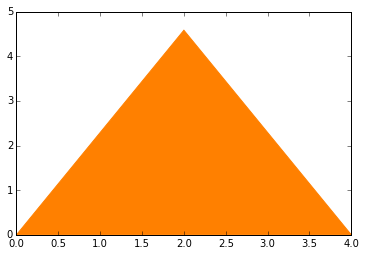

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

colorDict={'r':(1,0,0), 'g':(0,1,0), 'b':(0,0,1), 'w':(1,1,1), 'o':(1,0.5,0), 'y':(1,1,0),'tie':(160./255,32./255,40./255)}

pts = np.array([[0,0], [4,0], [2,np.sqrt(5**2 - 2**2)]])
p = Polygon(pts, closed=True,color=colorDict['o'])
ax = plt.gca()
ax.add_patch(p)
ax.set_xlim(0,4)
ax.set_ylim(0,5)
plt.show()

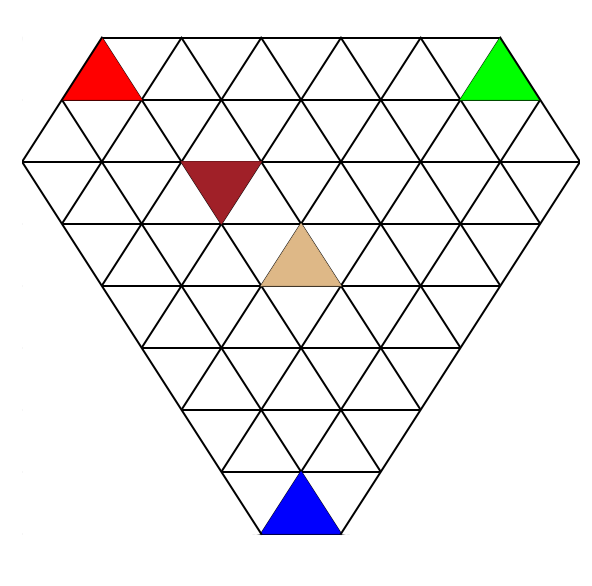

In [7]:

def blank_board():
    '''
    makes a super dank blank board and returns an axes object
    wanna add tile or something? pass the sweet object returned from this function to addTile along with coords!
    fuckin matplotlib objects mate. yeah!!!
    '''
    import matplotlib.pyplot as S00perMPL
    S00perMPL.figure(figsize=(10,10))


    pts = [[0,12], [2,16], [0,17]]
    tl = Polygon(pts, closed=True,color='white')

    pts = [[12,16], [14,12], [14,17]]
    tr = Polygon(pts,closed=True,color='white')

    pts = [[0,12], [6,0], [0,-1]]
    bl = Polygon(pts,closed=True,color='white')

    pts = [[8,0], [14,12], [14,-1]]
    br = Polygon(pts,closed=True,color='white')


    ax = S00perMPL.gca()
    ax.add_patch(tl)
    ax.add_patch(tr)
    ax.add_patch(bl)
    ax.add_patch(br)

    for i in range(0,9):
        ax.plot([0,14],[2*i,2*i],'k-',lw=2,zorder=0)

    for i in range(0,6):
        ax.plot([2*(i),8+i],[16,2*i],'k-',lw=2,zorder=0)
        ax.plot([14-2*i,6-i],[16,2*i],'k-',lw=2,zorder=0)



    ax.plot([0,6],[12,0],'k-',lw=2)
    ax.plot([14,8],[12,0],'k-',lw=2)

    ax.plot([0,2],[12,16],'k-',lw=2)
    ax.plot([12,14],[16,12],'k-',lw=2)


    ax.set_ylim([-1,17])
    ax.axis('off')
    pts=[[2,16],[1,14],[5,14],[4,16]]
    return ax

def addTile(ax,row=0,col=0,color=(222./255,184./255,135./255)):
    '''
    Default color is 'burlywood' an excellent name for a color
    Doesn't check if passed a valid position so don't fuck up
    but if you do just call blankboard again :D
    '''
    y=16-row*2
    if row<2:
        x=(2-row)+col
        if col%2==0:
            #Pointing Up
            pts=[[x,y],[x-1,y-2],[x+1,y-2]]
        else:
            pts=[[x-1,y],[x+1,y],[x,y-2]]
    else:

        x=(-1+row)+col
        if col%2==0:
            #Pointing Down
            pts=[[x-1,y],[x+1,y],[x,y-2]]
        else:
            pts=[[x,y],[x-1,y-2],[x+1,y-2]]
    ax.add_patch(Polygon(pts,closed=True,color=color))
def addMany(ax,pts=[[0,0,colorDict['r']],[0,10,colorDict['g']],[7,1,colorDict['b']]]):
    # The way the color is implemented, you can't pass points in without attached colors anymore.
    for pt in pts:
        addTile(ax,pt[0],pt[1],pt[2])
    

ax = blank_board()
addTile(ax,2,4,colorDict['tie'])
#addTile(ax,4,11) #a bad tile position- still gets drawn b/c no checks.
addTile(ax,3,5)
addMany(ax)

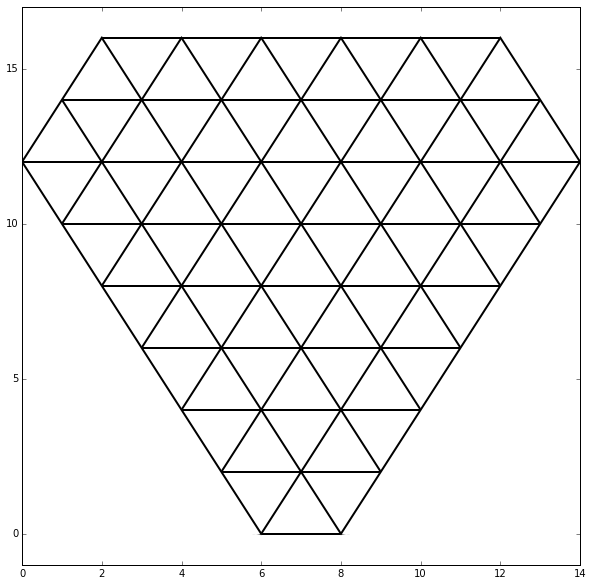

In [8]:
plt.figure(figsize=(10,10))


pts = [[0,12], [2,16], [0,17]]
tl = Polygon(pts, closed=True,color='white')

pts = [[12,16], [14,12], [14,17]]
tr = Polygon(pts,closed=True,color='white')

pts = [[0,12], [6,0], [0,-1]]
bl = Polygon(pts,closed=True,color='white')

pts = [[8,0], [14,12], [14,-1]]
br = Polygon(pts,closed=True,color='white')


ax = plt.gca()
ax.add_patch(tl)
ax.add_patch(tr)
ax.add_patch(bl)
ax.add_patch(br)


for i in range(0,9):
    ax.plot([0,14],[2*i,2*i],'k-',lw=2,zorder=0)

for i in range(0,6):
    ax.plot([2*(i),8+i],[16,2*i],'k-',lw=2,zorder=0)
    ax.plot([14-2*i,6-i],[16,2*i],'k-',lw=2,zorder=0)


    
ax.plot([0,6],[12,0],'k-',lw=2)
ax.plot([14,8],[12,0],'k-',lw=2)

ax.plot([0,2],[12,16],'k-',lw=2)
ax.plot([12,14],[16,12],'k-',lw=2)


ax.set_ylim([-1,17])
plt.show() 

(0.0, 1.0, 0.0, 1.0)

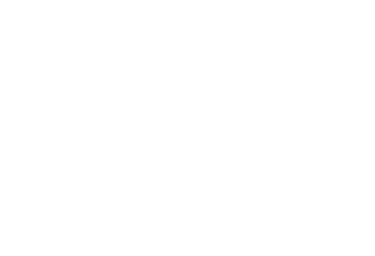

In [9]:
plt.axis('off')

In [10]:
113./255

0.44313725490196076

In [11]:
import traceback
import copy
import time
import sys

In [12]:
class EdgeException(Exception):
    pass
class DirectionException(Exception):
    pass
class InitializationException(Exception):
    pass

In [13]:
class Tile:
    def __init__(self):
        self.occupied = False
        self.visited = False
        self.neighbors = None
        self.direction = None
        self.coords = None
        self.edge = False
        self.piece = None

In [14]:
class Traverser:
    def __init__(self,board):
        self.board = board
        self.current = None
    
    def set_current(self,coords):
        self.current = self.board[coords[0],coords[1]]
    
    def move(self,direction):
        if self.current == None:
            #return False
            raise InitializationException("Not currently initialized to a tile.")
        if direction not in self.current.neighbors.keys():
            #return False
            raise DirectionException("Not a valid direction - this tile is pointing " + self.current.direction + " and you were trying to move in direction " + direction)
        self.current = self.current.neighbors[direction]
        return True

In [15]:
class Piece:
    def __init__(self,shape=None):
        t = []
        if shape is None:
            t = None
        elif shape is "boat":
            self.rotational_symmetry = "none"
            self.mirror_symmetry = True
            for i in range(6):
                t.append(Tile())
            t[0].direction, t[2].direction, t[4].direction = ("down",)*3
            t[1].direction, t[3].direction, t[5].direction = ("up",)*3
            t[0].neighbors = {"-B":t[1]}
            t[1].neighbors = {"B":t[0],"C":t[2]}
            t[2].neighbors = {"-C":t[1],"-B":t[3],"-A":t[5]}
            t[3].neighbors = {"B":t[2],"C":t[4]}
            t[4].neighbors = {"-C":t[3]}
            t[5].neighbors = {"A":t[2]}
            
        elif shape is "tie":
            self.rotational_symmetry = "half"
            self.mirror_symmetry = True
            for i in range(6):
                t.append(Tile())
            t[0].direction, t[2].direction, t[3].direction, t[5].direction = ("down",)*4
            t[1].direction, t[4].direction = ("up",)*2
            t[0].neighbors = {"-B":t[1]}
            t[1].neighbors = {"A":t[4],"B":t[0],"C":t[2]}
            t[2].neighbors = {"-C":t[1]}
            t[3].neighbors = {"C":t[4]}
            t[4].neighbors = {"-C":t[3],"-A":t[1],"-B":t[5]}
            t[5].neighbors = {"B":t[4]}
            
        elif shape is "check":
            self.rotational_symmetry = "none"
            self.mirror_symmetry = False
            for i in range(6):
                t.append(Tile())
            t[0].direction, t[2].direction, t[4].direction = ("up",)*3
            t[1].direction, t[3].direction, t[5].direction = ("down",)*3
            raise NotImplementedError("piece not implemented")
            
        elif shape is "line":
            raise NotImplementedError("piece not implemented")
        elif shape is "v":
            raise NotImplementedError("piece not implemented")
        elif shape is "heart":
            raise NotImplementedError("piece not implemented")
        elif shape is "s":
            raise NotImplementedError("piece not implemented")
        elif shape is "hexagon":
            raise NotImplementedError("piece not implemented")
        elif shape is "mountains":
            raise NotImplementedError("piece not implemented")
        elif shape is "fedex":
            raise NotImplementedError("piece not implemented")
        elif shape is "nike":
            raise NotImplementedError("piece not implemented")
        elif shape is "weird":
            raise NotImplementedError("piece not implemented")
        else:
            raise Exception("invalid piece")
        self.shape = shape
        self.tiles = t
    
    def get_rotation_range(self):
        if self.rotational_symmetry is "none":
            return range(6)
        if self.rotational_symmetry is "half":
            return range(3)
        if self.rotational_symmetry is "full":
            return range(1)
    
    def rotate(self,amount):
        
        def cycle(n):
            temp_n = {}
            if "A" in n.keys():
                temp_n["-C"] = n["A"]
            if "B" in n.keys():
                temp_n["-A"] = n["B"]
            if "C" in n.keys():
                temp_n["-B"] = n["C"]
            if "-A" in n.keys():
                temp_n["C"] = n["-A"]
            if "-B" in n.keys():
                temp_n["A"] = n["-B"]
            if "-C" in n.keys():
                temp_n["B"] = n["-C"]
            return temp_n
        
        if amount == 0:
            return
        amount = amount%5

        for t in self.tiles:
            if amount%2 != 0:
                if t.direction == "up":
                    t.direction = "down"
                elif t.direction == "down":
                    t.direction = "up"
            for i in range(amount):
                t.neighbors = cycle(t.neighbors)
        
    def is_mirror_symmetric(self):
        return self.mirror_symmetry
    
    def mirror(self):
        for t in self.tiles:
            temp_n = {}
            if "B" in t.neighbors:
                temp_n["C"] = t.neighbors["B"]
            if "C" in t.neighbors:
                temp_n["B"] = t.neighbors["C"]
            if "-B" in t.neighbors:
                temp_n["-C"] = t.neighbors["-B"]
            if "-C" in t.neighbors:
                temp_n["-B"] = t.neighbors["-C"]
            t.neighbors = temp_n
                

In [22]:

def blank_board():
    '''
    makes a super dank blank board and returns an axes object
    wanna add tile or something? pass the sweet object returned from this function to addTile along with coords!
    fuckin matplotlib objects mate. yeah!!!
    '''
    import matplotlib.pyplot as S00perMPL
    S00perMPL.figure(figsize=(10,10))


    pts = [[0,12], [2,16], [0,17]]
    tl = Polygon(pts, closed=True,color='white')

    pts = [[12,16], [14,12], [14,17]]
    tr = Polygon(pts,closed=True,color='white')

    pts = [[0,12], [6,0], [0,-1]]
    bl = Polygon(pts,closed=True,color='white')

    pts = [[8,0], [14,12], [14,-1]]
    br = Polygon(pts,closed=True,color='white')


    ax = S00perMPL.gca()
    ax.add_patch(tl)
    ax.add_patch(tr)
    ax.add_patch(bl)
    ax.add_patch(br)

    for i in range(0,9):
        ax.plot([0,14],[2*i,2*i],'k-',lw=2,zorder=0)

    for i in range(0,6):
        ax.plot([2*(i),8+i],[16,2*i],'k-',lw=2,zorder=0)
        ax.plot([14-2*i,6-i],[16,2*i],'k-',lw=2,zorder=0)



    ax.plot([0,6],[12,0],'k-',lw=2)
    ax.plot([14,8],[12,0],'k-',lw=2)

    ax.plot([0,2],[12,16],'k-',lw=2)
    ax.plot([12,14],[16,12],'k-',lw=2)


    ax.set_ylim([-1,17])
    ax.axis('off')
    pts=[[2,16],[1,14],[5,14],[4,16]]
    return ax

def addTile(ax,row=0,col=0,color=(222./255,184./255,135./255)):
    '''
    Default color is 'burlywood' an excellent name for a color
    Doesn't check if passed a valid position so don't fuck up
    but if you do just call blankboard again :D
    '''
    y=16-row*2
    if row<2:
        x=(2-row)+col
        if col%2==0:
            #Pointing Up
            pts=[[x,y],[x-1,y-2],[x+1,y-2]]
        else:
            pts=[[x-1,y],[x+1,y],[x,y-2]]
    else:

        x=(-1+row)+col
        if col%2==0:
            #Pointing Down
            pts=[[x-1,y],[x+1,y],[x,y-2]]
        else:
            pts=[[x,y],[x-1,y-2],[x+1,y-2]]
    ax.add_patch(Polygon(pts,closed=True,color=color))
def addMany(ax,pts=[[0,0],[0,10],[7,1]]):
    for pt in pts:
        addTile(ax,pt[0],pt[1])
class Board:
    def __init__(self):
        self.board = list(range(8))
        self.edges = []
        self.board[0] = list(range(11))
        self.board[1] = list(range(13))
        for i in range(6):
            self.board[i+2] = list(range(13-2*i))
        for i in range(len(self.board)):
            if i<2:
                direction = "up"
            else:
                direction = "down"
            for j in self.board[i]:
                new_t = Tile()
                new_t.direction = direction
                new_t.coords = [i,j]
                self.board[i][j] = new_t
                
                #direction = (direction == "down" ? "up" : "down")
                if direction == "down":
                    direction = "up"
                elif direction == "up":
                    direction = "down"
        for i in range(len(self.board)):
            for j in range(len(self.board[i])):
                t = self.board[i][j]
                if j == 0 or j == len(self.board[i])-1:
                    self.edges.append(t)
                    t.edge = True
                elif i==7 and j==1:
                    self.edges.append(t)
                    t.edge = True
                if i==0 and (j-1)%2==0:
                    self.edges.append(t)
                    t.edge = True
                this_n = {}
                horiz_index_left = j-1
                horiz_index_right = j+1
                if t.direction == "up":
                    vert_index = i+1
                elif t.direction == "down":
                    vert_index = i-1
                
                if horiz_index_left>=0:
                    temp_tile = self.board[i][horiz_index_left]
                    if t.direction == "up":
                        this_n["B"] = temp_tile
                    else:
                        this_n["-C"] = temp_tile
                if horiz_index_right<len(self.board[i]):
                    temp_tile = self.board[i][horiz_index_right]
                    if t.direction == "up":
                        this_n["C"] = temp_tile
                    else:
                        this_n["-B"] = temp_tile
                
                if vert_index in list(range(len(self.board))):
                    if i==0 and t.direction == "up":
                        this_n["A"] = self.board[vert_index][j+1]
                    if i==1 and t.direction == "up":
                        this_n["A"] = self.board[vert_index][j]
                    if i==1 and t.direction == "down":
                        this_n["-A"] = self.board[vert_index][j-1]
                    if i==2 and t.direction == "up":
                        this_n["A"] = self.board[vert_index][j-1]
                    if i==2 and t.direction == "down":
                        this_n["-A"] = self.board[vert_index][j]
                    for k in range(5):
                        if i==k+3 and t.direction == "up":
                            this_n["A"] = self.board[vert_index][j-1]
                        if i==k+3 and t.direction == "down":
                            this_n["-A"] = self.board[vert_index][j+1]
                self.board[i][j].neighbors = this_n
    
    def tiles(self):
        for row in self.board:
            for t in row:
                yield t
                
    def unoccupied(self):
        for row in self.board:
            for t in row:
                if not t.occupied:
                    yield t
    
    def occupied(self):
        for row in self.board:
            for t in row:
                if t.occupied:
                    yield t
    
    def edges(self):
        for e in self.edges:
            yield e
                
    def __getitem__(self,tup):
        y = tup[0]
        x = tup[1]
        return self.board[y][x]
    
    def place(self,piece,position,traverser,min_edges=2):
        
        if self.__getitem__(position).direction != piece.tiles[0].direction:
            #return False
#             print "piece first tile direction: " + piece.tiles[0].direction
#             print "board tile direction: " + self.__getitem__(position).direction
#             print '-------------'
            raise DirectionException("the first tile of this piece is pointing " + piece.tiles[0].direction + ", the specified position on the board is a tile pointing " + self.__getitem__(position).direction)
        
        #piece_copy = copy.deepcopy(piece)
        
        piece.tiles[0].coords = position
#         print 'here are the coordinates of this piece (position=' + str(position) + ':'
#         for t in piece_copy.tiles:
#             print "#", t.coords
        
        has_unplaced_neighbors = [piece.tiles[0]]
        unplaced = piece.tiles[1:]
        
        # set coordinates of all the pieces, raise exception (in traverser class) if the piece does not fit properly on the board
        while(len(has_unplaced_neighbors)>0):
            has_unplaced_neighbors_copy = has_unplaced_neighbors
            has_unplaced_neighbors = []
            for p in has_unplaced_neighbors_copy:
                just_placed = []
                for d,n in p.neighbors.iteritems():
                    if n.coords == None:
                        traverser.set_current(p.coords)
                        try:
                            traverser.move(d)
                            n.coords = traverser.current.coords
                            just_placed.append(n)
                        except (InitializationException, DirectionException):
                            traceback.print_exc()
                            for t in piece.tiles:
                                t.coords = None
                            raise DirectionException("piece didn't fit on board")

                has_unplaced_neighbors.extend(just_placed)
        
        num_edges_covered = 0
        for t in piece.tiles:
            #print "tile: " + str(t.coords)
            if self.__getitem__(t.coords).edge:
                num_edges_covered = num_edges_covered+1
        
        if num_edges_covered < min_edges:
            #return False
            raise EdgeException("not enough edges covered, tile not placed")
        else:
            # place pieces on board, remove edges
            for t in piece.tiles:
                board_t = self.__getitem__(t.coords)
                board_t.occupied = True
                board_t.piece = piece.shape
                if board_t.edge:
                    board_t.edge = False
                    self.edges.remove(board_t)

            # update edges
            for t in piece.tiles:
                board_t = self.__getitem__(t.coords)
                for d,n in board_t.neighbors.iteritems():
                    if not n.occupied:
                        n.edge = True
                        self.edges.append(n)
                t.coords = None
            return True
    def print_board(self):
        ax = blank_board()
        colorDict = {'tie':(1,.5,1),'boat':(0,0,0)}
        for i in range(len(self.board)):
            for j in range(len(self.board[i])):
                if self.board[i][j].piece is not None:
                    #print(self.board[i][j].piece)
                    addTile(ax,i,j,colorDict[self.board[i][j].piece])


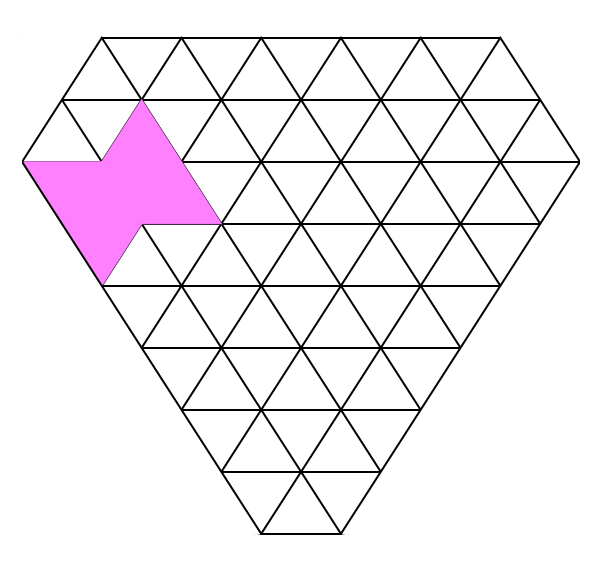

In [26]:
a = Board()
p = Piece("tie")
p.rotate(1)
tr = Traverser(a)
a.place(p,[1,2],tr)
a.print_board()

In [27]:
def find_fits(board,piece):
    a = copy.deepcopy(board)
    solns = []
    traverser = Traverser(a)
    for r in piece.get_rotation_range():
        for t in board.unoccupied():
            #print t.coords
            try:
                a.place(piece,t.coords,traverser)
                solns.append(copy.deepcopy(a))
                #a.print_board()
                a.__init__()
                traverser.__init__(a)
            #print success
            except (DirectionException, EdgeException):
                continue
        piece.rotate(1)
    return solns

In [28]:
start = time.clock()
p = Piece("tie")
p.rotate(1)

solns = find_fits(Board(),p)
for s in solns:
    s.print_board()

Traceback (most recent call last):
  File "<ipython-input-22-5ef07fb79993>", line 208, in place
    traverser.move(d)
  File "<ipython-input-14-cd2798c55d01>", line 15, in move
    raise DirectionException("Not a valid direction - this tile is pointing " + self.current.direction + " and you were trying to move in direction " + direction)
DirectionException: Not a valid direction - this tile is pointing up and you were trying to move in direction B
